<a href="https://colab.research.google.com/github/AttilaRoshani/AttilaRoshani.github.io/blob/master/HandwritenNumberRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
# hyper prametrs
num_epochs = 5
batch_size = 64
learning_rate = 0.001
input_size = 784
hidden_size = 100
num_classes = 10

In [ ]:

trainig_dataset = torchvision.datasets.MNIST(root='./data',
                                train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                train=False,transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=trainig_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
example = iter(train_loader)
samples, labels = next(example)  # Use next(example) instead of example.next()
print(samples.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


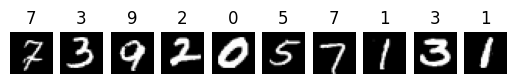

In [ ]:
for i in range (10):
  plt.subplot(1,10,i+1)
  plt.imshow(samples[i][0],cmap='gray',)
  plt.title(labels[i].item())  # Display labels using title
  plt.axis('off')
plt.show()



In [ ]:
class NuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
model = NuralNet(input_size,hidden_size,num_classes).to(device)

In [ ]:


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    loss = criterion(y_pred,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss = {loss.item():.4f}')


epoch 1/5,step 938/938,loss = 0.2501
epoch 2/5,step 938/938,loss = 0.1511
epoch 3/5,step 938/938,loss = 0.0989
epoch 4/5,step 938/938,loss = 0.1303
epoch 5/5,step 938/938,loss = 0.0291


In [ ]:


with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in train_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    _,predictions = torch.max(y_pred,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

accuracy = 98.36166666666666


In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    y_pred = model(images)
    _,predictions = torch.max(y_pred,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

accuracy = 97.18
